In [78]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# load dataset
classification_data = pd.read_csv("/content/drive/MyDrive/Machine Learning/CW/BreastCancer_Classification.csv")

In [80]:
classification_data.head(15)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,1.561836,0,0,0,0,1,3,1,-1.254687,1,1,1.185726,-0.618501,60,0
1,-0.445311,0,1,1,2,0,2,1,0.215996,1,1,-0.044689,0.166621,62,0
2,0.446754,0,2,2,4,0,2,1,1.544355,1,1,-0.044689,0.559182,75,0
3,0.446754,0,0,0,0,1,3,1,-0.590508,1,1,-1.521189,-0.618501,84,0
4,-0.779836,0,1,0,1,1,3,1,0.500644,1,1,-1.398147,-0.618501,50,0
5,-0.333803,0,0,0,0,0,2,1,-0.495625,1,1,0.447477,-0.422220,89,0
6,-0.333803,0,0,0,0,3,1,1,-1.064922,1,1,-0.413814,-0.618501,54,0
7,-1.560393,0,1,0,1,0,2,1,-0.021211,1,1,-0.659897,-0.618501,14,1
8,-1.560393,0,3,2,4,1,3,1,3.442011,1,1,0.693560,2.718266,70,0
9,1.673345,0,3,2,4,3,1,0,0.073672,1,1,0.816602,1.540584,92,0


In [81]:
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4017 non-null   float64
 1   Sex                     4017 non-null   int64  
 2   T_Stage                 4017 non-null   int64  
 3   N_Stage                 4017 non-null   int64  
 4   6th_Stage               4017 non-null   int64  
 5   Differentiated          4017 non-null   int64  
 6   Grade                   4017 non-null   int64  
 7   A_Stage                 4017 non-null   int64  
 8   Tumor_Size              4017 non-null   float64
 9   Estrogen_Status         4017 non-null   int64  
 10  Progesterone_Status     4017 non-null   int64  
 11  Regional_Node_Examined  4017 non-null   float64
 12  Reginol_Node_Positive   4017 non-null   float64
 13  Survival_Months         4017 non-null   int64  
 14  Mortality_Status        4017 non-null   

In [82]:
classification_data.describe()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
count,4.017000e+03,4017.00000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4.017000e+03,4017.000000,4017.000000,4.017000e+03,4.017000e+03,4017.000000,4017.000000
mean,-2.122607e-17,0.00473,0.784416,0.437889,1.320139,0.689320,2.151606,0.977346,9.021080e-17,0.933035,0.826487,5.483402e-17,7.959777e-18,71.473488,0.153099
std,1.000124e+00,0.06862,0.765169,0.693013,1.265964,1.015109,0.637997,0.148815,1.000124e+00,0.249993,0.378737,1.000124e+00,1.000124e+00,25.365110,0.360128
min,-2.675475e+00,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.397012e+00,0.000000,0.000000,-1.644230e+00,-6.185006e-01,1.000000,0.000000
25%,-7.798356e-01,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,-6.853906e-01,1.000000,1.000000,-6.598975e-01,-6.185006e-01,56.000000,0.000000
50%,7.217358e-04,0.00000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-2.584180e-01,1.000000,1.000000,-4.468949e-02,-4.222203e-01,73.000000,0.000000
75%,7.812790e-01,0.00000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,3.583201e-01,1.000000,1.000000,5.705185e-01,1.666209e-01,90.000000,0.000000
max,3.903508e+00,1.00000,3.000000,2.000000,4.000000,3.000000,4.000000,1.000000,5.197343e+00,1.000000,1.000000,5.738265e+00,8.214117e+00,760.000000,1.000000


In [83]:
# display basic information
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [84]:
print(classification_data.head(15))
print(classification_data.info())

         Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  \
0   1.561836    0        0        0          0               1      3        1   -1.254687                1                    1   
1  -0.445311    0        1        1          2               0      2        1    0.215996                1                    1   
2   0.446754    0        2        2          4               0      2        1    1.544355                1                    1   
3   0.446754    0        0        0          0               1      3        1   -0.590508                1                    1   
4  -0.779836    0        1        0          1               1      3        1    0.500644                1                    1   
5  -0.333803    0        0        0          0               0      2        1   -0.495625                1                    1   
6  -0.333803    0        0        0          0               3      1       

In [85]:
# handle missing values (if any)
classification_data = classification_data.dropna()

In [86]:
# display the column names of the DataFrame
print(classification_data.columns)

Index(['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
       'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')


In [87]:
# define features and target variable
classification_features = [
    'Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
       'Regional_Node_Examined', 'Reginol_Node_Positive']

In [88]:
X = classification_data[classification_features]
y = classification_data['Mortality_Status']

In [89]:
# import the necessary function from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV

In [90]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Logistic Regression

In [98]:
# importing necessary package for logistic regression
from sklearn.linear_model import LogisticRegression

In [99]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [100]:
# import accuracy_score and classification_report
from sklearn.metrics import accuracy_score, classification_report

In [122]:
# Evaluation
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8557213930348259
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       681
           1       0.60      0.17      0.27       123

    accuracy                           0.86       804
   macro avg       0.73      0.58      0.59       804
weighted avg       0.83      0.86      0.82       804



In [125]:
# importing necessary packages for confusion matrix and display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

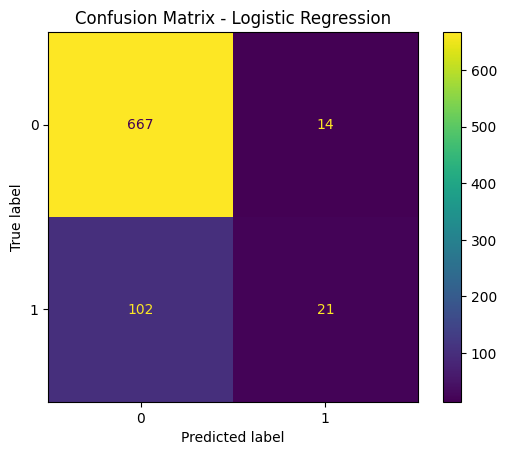

In [126]:
cm_log = confusion_matrix(y_test, y_pred_logreg, labels=logreg.classes_)
disp_log = ConfusionMatrixDisplay(cm_log, display_labels=logreg.classes_)
disp_log.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [127]:
# importing the library to show the roc curve display from sklearn package
from sklearn.metrics import classification_report, RocCurveDisplay

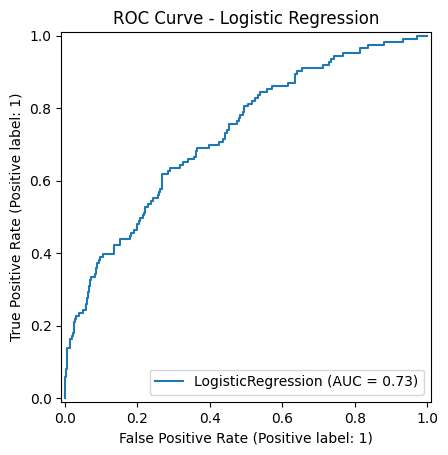

In [128]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

#K-Nearest Neighbours

In [129]:
# importing the library for KNN package
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [134]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8308457711442786
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       681
           1       0.39      0.18      0.24       123

    accuracy                           0.83       804
   macro avg       0.63      0.56      0.57       804
weighted avg       0.79      0.83      0.80       804



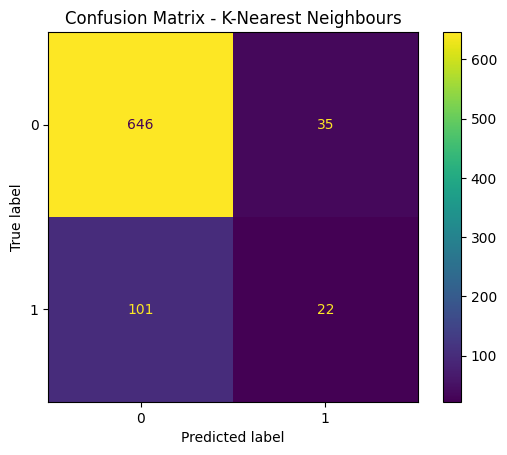

In [135]:
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn.plot()
plt.title("Confusion Matrix - K-Nearest Neighbours")
plt.show()

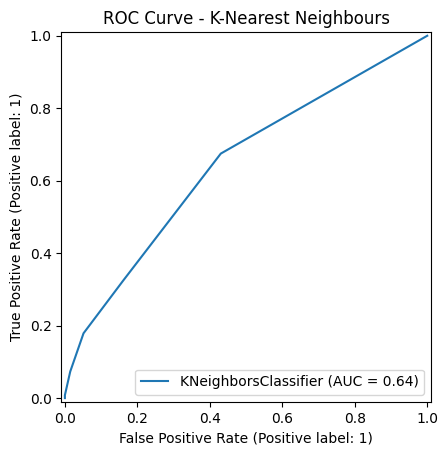

In [136]:
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title("ROC Curve - K-Nearest Neighbours")
plt.show()

#Naive Bayes

In [137]:
# import the necessary library for Gaussian
from sklearn.naive_bayes import GaussianNB

In [138]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [139]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7748756218905473
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       681
           1       0.33      0.44      0.37       123

    accuracy                           0.77       804
   macro avg       0.61      0.64      0.62       804
weighted avg       0.81      0.77      0.79       804



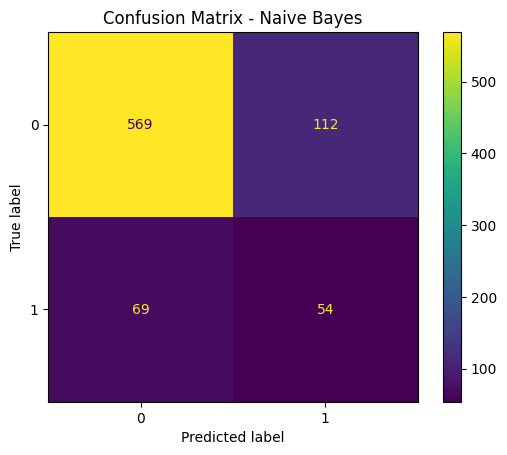

In [140]:
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp_nb = ConfusionMatrixDisplay(cm_nb, display_labels=nb.classes_)
disp_nb.plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

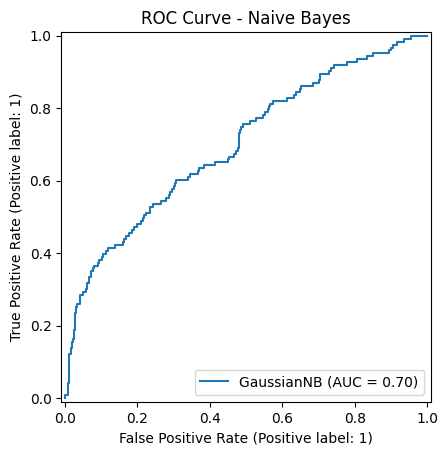

In [141]:
RocCurveDisplay.from_estimator(nb, X_test, y_test)
plt.title("ROC Curve - Naive Bayes")
plt.show()

#Model Comparison

In [142]:
# Comparing accuracies of all three models on the test set
print(f"Logistic Regression: {logreg_accuracy:.4f}")
print(f"K-Nearest Neighbours : {knn_accuracy:.4f}")
print(f"Naive Bayes: {nb_accuracy:.4f}")

Logistic Regression: 0.8557
K-Nearest Neighbours : 0.8308
Naive Bayes: 0.7749


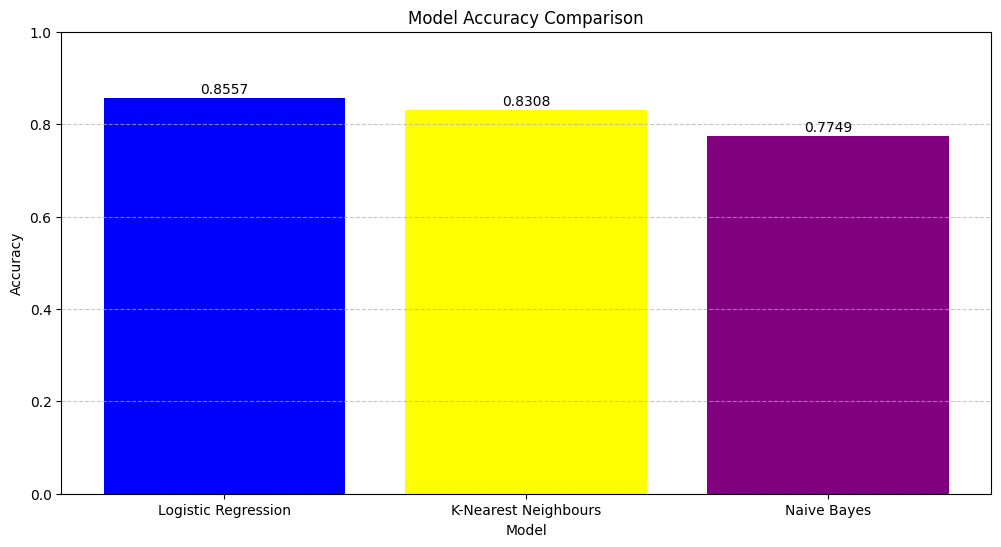

In [145]:
# Create a bar chart to visualize model accuracies
plt.figure(figsize=(12, 6))
models = ['Logistic Regression', 'K-Nearest Neighbours', 'Naive Bayes']
accuracies = [logreg_accuracy, knn_accuracy, nb_accuracy]
plt.bar(models, accuracies, color=['blue', 'yellow', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
plt.show()

#Hyeprparameter Tuning for Logistic Regression

In [186]:
# import requires library for Grid Search
from sklearn.model_selection import GridSearchCV

In [199]:
# Define the hyperparameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

In [200]:
# Create the GridSearchCV object with Logistic Regression
grid_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5)
grid_logreg.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [1000],
                         'penalty': ['l2'], 'solver': ['lbfgs']})

In [201]:
# Display the best hyperparameter combination found by GridSearch
print("Best Parameters for Logistic Regression:", grid_logreg.best_params_)

Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [202]:
# Predict using the best model
y_pred_logreg_grid = grid_logreg.predict(X_test)

In [224]:
# Evaluate the performance of the tuned model
logreg_tun_accuracy = accuracy_score(y_test, y_pred_logreg_grid)
print("Tuned Logistic Regression Accuracy:", logreg_tun_accuracy)
print(classification_report(y_test, y_pred_logreg_grid))

Tuned Logistic Regression Accuracy: 0.8594527363184079
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       681
           1       0.66      0.17      0.27       123

    accuracy                           0.86       804
   macro avg       0.76      0.58      0.60       804
weighted avg       0.84      0.86      0.82       804



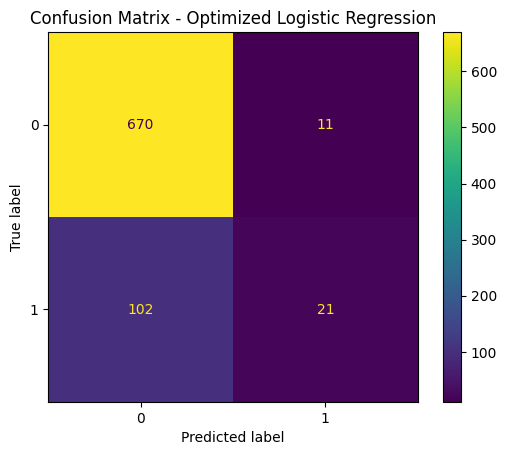

In [225]:
cm_log_grid = confusion_matrix(y_test, y_pred_logreg_grid, labels=grid_logreg.classes_)
disp_log_grid = ConfusionMatrixDisplay(cm_log_grid, display_labels=grid_logreg.classes_)
disp_log_grid.plot()
plt.title("Confusion Matrix - Optimized Logistic Regression")
plt.show()

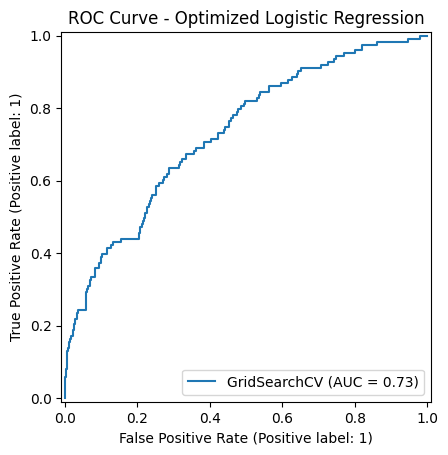

In [226]:
RocCurveDisplay.from_estimator(grid_logreg, X_test, y_test)
plt.title("ROC Curve - Optimized Logistic Regression")
plt.show()

#Hyeprparameter Tuning for KNN

In [227]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [228]:
# Create the GridSearchCV object with KNN classifier
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

In [229]:
# Fit the model to the training data
grid_knn.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [230]:
# Output the best hyperparameter combination
print("Best Parameters for KNN:", grid_knn.best_params_)

Best Parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}


In [232]:
# Predict with the best tuned model
y_pred_knn_grid = grid_knn.predict(X_test)

In [233]:
# Evaluate the tuned KNN model
knn_tun_accuracy = accuracy_score(y_test, y_pred_knn_grid)
print("Tuned KNN Accuracy:", knn_tun_accuracy)
print(classification_report(y_test, y_pred_knn_grid))

Tuned KNN Accuracy: 0.8582089552238806
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       681
           1       0.64      0.17      0.27       123

    accuracy                           0.86       804
   macro avg       0.75      0.58      0.60       804
weighted avg       0.83      0.86      0.82       804



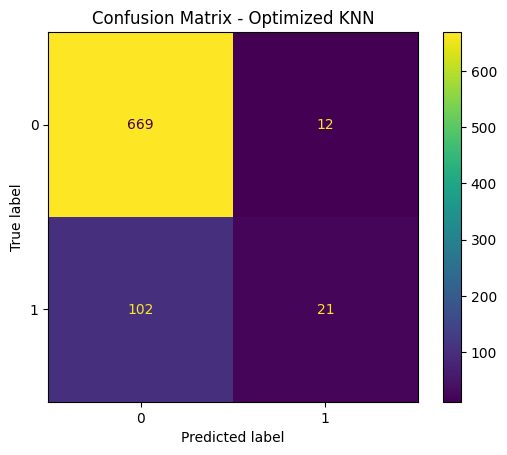

In [234]:
cm_knn_grid = confusion_matrix(y_test, y_pred_knn_grid, labels=grid_knn.classes_)
disp_knn_grid = ConfusionMatrixDisplay(cm_knn_grid, display_labels=grid_knn.classes_)
disp_knn_grid.plot()
plt.title("Confusion Matrix - Optimized KNN")
plt.show()

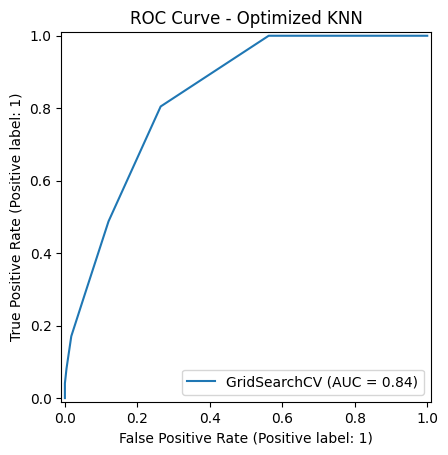

In [235]:
# Plot the ROC curve for the tuned KNN model
RocCurveDisplay.from_estimator(grid_knn, X_test, y_test)
plt.title("ROC Curve - Optimized KNN")
plt.show()

#Hyeprparameter Tuning for Naive Bayes

In [236]:
# Define a hyperparameter grid for GaussianNB
# 'var_smoothing' is a small value added to variances to prevent division by zero
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

In [237]:
# Create the GridSearchCV object with GaussianNB
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)

In [238]:
# Fit the model with training data
grid_nb.fit(X, y)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]})

In [239]:
# Output the best hyperparameters
print("Best Parameters for Naive Bayes:", grid_nb.best_params_)

Best Parameters for Naive Bayes: {'var_smoothing': 1e-06}


In [240]:
# Predict using the best model
y_pred_nb_grid = grid_nb.predict(X_test)

In [241]:
# Evaluate the tuned Naive Bayes model
nb_tun_accuracy = accuracy_score(y_test, y_pred_nb_grid)
print("Tuned Naive Bayes Accuracy:", nb_tun_accuracy)
print(classification_report(y_test, y_pred_nb_grid))

Tuned Naive Bayes Accuracy: 0.7748756218905473
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       681
           1       0.32      0.43      0.37       123

    accuracy                           0.77       804
   macro avg       0.61      0.63      0.62       804
weighted avg       0.80      0.77      0.79       804



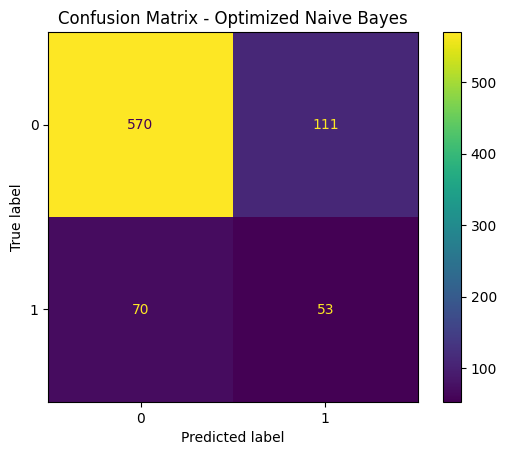

In [242]:
cm_nb_grid = confusion_matrix(y_test, y_pred_nb_grid, labels=grid_nb.classes_)
disp_nb_grid = ConfusionMatrixDisplay(cm_nb_grid, display_labels=grid_nb.classes_)
disp_nb_grid.plot()
plt.title("Confusion Matrix - Optimized Naive Bayes")
plt.show()

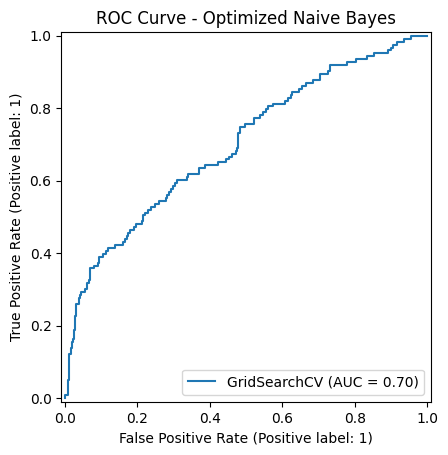

In [243]:
RocCurveDisplay.from_estimator(grid_nb, X_test, y_test)
plt.title("ROC Curve - Optimized Naive Bayes")
plt.show()

#Model Comparison - Optimized

In [244]:
# Compare the performance of original and optimized models
print(f"Logistic Regression: {logreg_accuracy:.4f} -> {logreg_tun_accuracy:.4f}")
print(f"K-Nearest Neighbours: {knn_accuracy:.4f} -> {knn_tun_accuracy:.4f}")
print(f"Naive Bayes: {nb_accuracy:.4f} -> {nb_tun_accuracy:.4f}")

Logistic Regression: 0.8557 -> 0.8595
K-Nearest Neighbours: 0.8308 -> 0.8582
Naive Bayes: 0.7749 -> 0.7749


In [245]:
tuned_accuracies = [logreg_tun_accuracy, knn_tun_accuracy, nb_tun_accuracy]

In [246]:
best_model_name_before = models[np.argmax(accuracies)]
best_accuracy_before = max(accuracies)

print(f"\nBest performing model before hyperparameter tuning: {best_model_name_before}")
print(f"Best Original accuracy: {best_accuracy_before:.4f}")


Best performing model before hyperparameter tuning: Logistic Regression
Best Original accuracy: 0.8557


In [247]:
# Identify the best model based on test accuracy
best_model_name = models[np.argmax(tuned_accuracies)]
best_accuracy = max(tuned_accuracies)

print(f"\nBest performing model after hyperparameter tuning: {best_model_name}")
print(f"Best accuracy after tuning (Overall best accuracy): {best_accuracy:.4f}")


Best performing model after hyperparameter tuning: Logistic Regression
Best accuracy after tuning (Overall best accuracy): 0.8595
